In [299]:
from IPython.display import Image, display
import numpy as np
import os
from os.path import join
from PIL import ImageFile
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import torch
import torch.nn as nn
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')
import torchvision
import torchvision.datasets as datasets
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
# from tensorflow.python.keras.applications.resnet50 import preprocess_input
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.mixture import GaussianMixture
from sklearn.isotonic import IsotonicRegression
from sklearn.svm import OneClassSVM
import re
import tensorflow as tf   

# Display the version
print(tf.__version__)     
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

print("imports complete")


2.4.1
imports complete


In [300]:
model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)
torch.cuda.is_available()
# model.cuda()

Using cache found in /home/abates/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


False

In [301]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# print(trainset)
tmp = np.array(trainset.targets)
index = np.where(tmp == 6)
# print(index)
trainset.data=trainset.data[index[0]]
trainset.targets=[x for x in trainset.targets if x == 6]
# print(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
tmp = np.array(trainset.targets)
index = np.where(tmp == 6)
testset.data=testset.data[index[0]]
testset.targets=[x for x in testset.targets if x == 6]
# print(testset)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)

# X_train = np.array(trainset.data)
# y_train = np.array(trainset.targets)
# X_test = np.array(testset.data)
# y_test = np.array(testset.targets)

# count = 0
# for batch in trainloader:
#     count += 1 
#     print(batch)
#     print("---------------")
#     print(batch[0])
#     if count > 4:
#         break
# count = 0


data_path = './data/allfrog/'
poisoned_train_dataset = datasets.ImageFolder(
    root=data_path,
    transform=transform
)
poisoned_train_loader = DataLoader(
    poisoned_train_dataset,
    batch_size=1,
    num_workers=2,
    shuffle=True
)

print(poisoned_train_loader)

Files already downloaded and verified
Files already downloaded and verified


In [302]:
# from torch.utils.data import Dataset

# class MyDataset(Dataset):
#     def __init__(self, data, labels):
#         self.data = data
#         self.labels = labels

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         return self.data[idx], self.labels[idx]

# train_dataset = MyDataset(x_train, y_train)
# test_dataset = MyDataset(x_test, y_test)

# from torch.utils.data import DataLoader

# train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
# test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [303]:
count = 0
for batch in trainloader:
    count += 1 
    print(batch)
    print("---------------")
    print(batch[0])
    if count > 2:
        break
count = 0
# for batch in train_dataloader:
#     count += 1 
#     print(batch)
#     print("---------------")
#     print(batch[0])
#     if count > 2:
#         break
# count = 0
for batch in poisoned_train_loader:
    count += 1
    print(batch)
    print("---------------")
    print(batch[0])
    if count > 2:
        break

[tensor([[[[-1.1075, -1.3815, -1.2617,  ...,  0.5878,  0.4851,  0.4166],
          [-1.8439, -2.1179, -1.8097,  ..., -0.0116, -0.0801, -0.0287],
          [-1.6898, -1.8439, -1.2788,  ..., -0.0972, -0.0629, -0.2513],
          ...,
          [ 1.4440,  1.3242,  1.2728,  ...,  0.6221, -1.1589, -1.2103],
          [ 0.9646,  0.8447,  1.0673,  ...,  1.0331, -0.4568, -0.6965],
          [ 0.9132,  0.7591,  0.9474,  ...,  1.5810,  0.4679, -0.0116]],

         [[-0.9503, -1.2304, -1.1954,  ...,  0.2752,  0.1527,  0.1352],
          [-1.6856, -2.0357, -1.8957,  ..., -0.4951, -0.5826, -0.5126],
          [-1.6155, -1.9132, -1.5630,  ..., -0.5651, -0.5651, -0.7577],
          ...,
          [ 0.9405,  0.6429,  0.7829,  ...,  0.2927, -1.4930, -1.4405],
          [ 0.3978,  0.1176,  0.4853,  ...,  0.5553, -0.9503, -1.1078],
          [ 0.4853,  0.2227,  0.4503,  ...,  1.1856,  0.0301, -0.4251]],

         [[-0.7064, -1.0201, -1.0550,  ...,  0.0779, -0.0267, -0.0092],
          [-1.4559, -1.8044, 

In [304]:
normal_flat_dataset = [torch.flatten(batch[0]).numpy() for batch in trainloader]
# normal_flat_testset = [torch.flatten(batch[0]).numpy() for batch in testloader]


In [306]:
poisoned_flat_dataset = [torch.flatten(batch[0]).numpy() for batch in poisoned_train_loader]

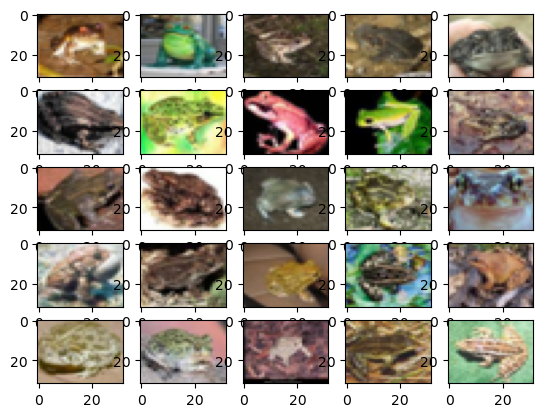

In [307]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1

plt.show()

In [308]:
# number of classes
K = len(set(y_train))

# calculate total number of classes 
# for output layer
print("number of classes:", K)
print(set(y_train))

# model.fc = nn.Identity()
# features = model(x_train)

feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
### check this works
x = torch.randn([1,3,224,224])
output = feature_extractor(x) # output now has the features corresponding to input x
print(output.shape)
# print(output)

number of classes: 1
{6}
torch.Size([1, 64, 1, 1])


In [309]:
model.eval()

CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [310]:
osvm_base = OneClassSVM(gamma='auto', kernel='rbf', nu=0.0909)
osvm_base.fit(normal_flat_dataset)

OneClassSVM(gamma='auto', nu=0.0909)

[[  -1  452]
 [   1 4548]]
452 4548


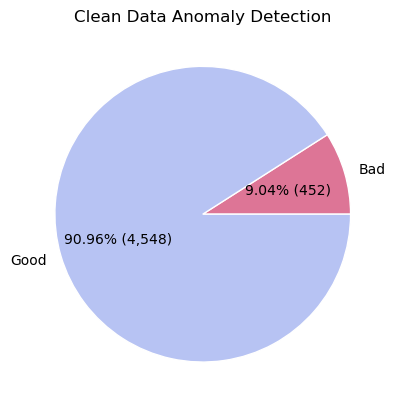

In [311]:
normal_predict = osvm_base.predict(normal_flat_dataset)
tmp = np.array(np.unique(normal_predict, return_counts=True)).T
print(tmp)

# grapharr = normal_predict
# grapharr = [0 if x == -1 else x for x in grapharr]
# binary_string = "".join(str(x) for x in grapharr)

# # Count 0s and 1s
# zeros = binary_string.count('0')
# ones = binary_string.count('1')

# # Plot histogram
# plt.bar(['-1', '1'], [zeros, ones])
# plt.title('Binary Data Distribution')
# plt.xlabel('Bit Value')
# plt.ylabel('Frequency')
# plt.show()

print(tmp[0][1], tmp[1][1])
# Data
labels = ['Bad', 'Good']
sizes = [tmp[0][1], tmp[1][1]]
colors = ['#DD7596', '#B7C3F3']

# Create pie chart
plt.pie(sizes, labels=labels, autopct=lambda p : '{:.2f}% ({:,.0f})'.format(p,p * sum(sizes)/100), wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)

# Add a title
plt.title('Clean Data Anomaly Detection')

# Display the chart
plt.show()

[[  -1  484]
 [   1 5016]]
[1 1 1 ... 1 1 1]
484 5016


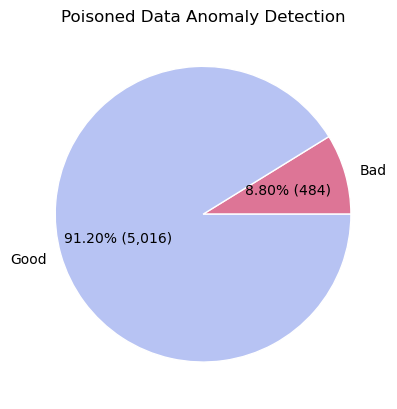

In [312]:
infected_predict = osvm_base.predict(poisoned_flat_dataset)
tmp = np.array(np.unique(infected_predict, return_counts=True)).T
print(tmp)
print(infected_predict)

print(tmp[0][1], tmp[1][1])
# Data
labels = ['Bad', 'Good']
sizes = [tmp[0][1], tmp[1][1]]
colors = ['#DD7596', '#B7C3F3']

# Create pie chart
plt.pie(sizes, labels=labels, autopct=lambda p : '{:.2f}% ({:,.0f})'.format(p,p * sum(sizes)/100), wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)

# Add a title
plt.title('Poisoned Data Anomaly Detection')

# Display the chart
plt.show()

In [314]:
results = ""

for x in infected_predict:
    if x == -1:
        results += "bad\n"
    else:
        results += "good\n"

with open("labels.txt", "w") as f:
    f.write(results)

In [246]:
model.eval()
normal_features = []
infected_features = []

# # Normal Loader
# with torch.no_grad():
#     for _, images in enumerate(trainloader):
#         outputs = model(images)
#         normal_features.append(outputs)
        
# # Tumor Loader
# with torch.no_grad():
#     for _, images in enumerate(poisoned_train_loader):
#         outputs = model(images)
#         infected_features.append(outputs)

# normal_ffl_dataset = np.array([torch.flatten(batch[0]).numpy() for batch in normal_features])
# infected_ffl_dataset = np.array([torch.flatten(batch[0]).numpy() for batch in infected_features])

TypeError: conv2d() received an invalid combination of arguments - got (list, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)
